In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
hava_durumu=pd.read_csv("NEM_SICAKLIK.csv")

In [3]:
hava_durumu.head()

,NEM,Sıcaklık,Hava Durumu
0,68.0,19.6,Bulutlu
1,68.0,19.5,Bulutlu
2,68.0,19.5,Bulutlu
3,68.0,19.5,Bulutlu
4,68.0,19.5,Bulutlu


In [33]:
hava_durumu.keys()

Index(['NEM', 'Sıcaklık', 'Hava Durumu'], dtype='object')

In [34]:
hava_durumu['Hava Durumu'].unique()

array(['Bulutlu', 'Yagmurlu', 'Gunesli'], dtype=object)

In [4]:
factorized_mapping = dict(enumerate(hava_durumu['Hava Durumu'].unique()))
hava_durumu['Hava Durumu'] = pd.factorize(hava_durumu['Hava Durumu'])[0]
print(factorized_mapping)

{0: 'Bulutlu', 1: 'Yagmurlu', 2: 'Gunesli'}


In [5]:
features = hava_durumu[['Sıcaklık','NEM']]
labels = hava_durumu[['Hava Durumu']]

# Train Test Split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=0)
     

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Çıkış katmanı, üç sınıf için softmax aktivasyon fonksiyonu
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
results=model.fit(
    features_train,labels_train,
    epochs=6,
    validation_data=(features_test, labels_test)
    )

Epoch 1/6
85/85 [==============================] - 3s 10ms/step - loss: 2.5077 - accuracy: 0.5529 - val_loss: 0.6581 - val_accuracy: 0.9446
Epoch 2/6
85/85 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.9506 - val_loss: 0.4535 - val_accuracy: 0.9654
Epoch 3/6
85/85 [==============================] - 0s 6ms/step - loss: 0.3839 - accuracy: 0.9885 - val_loss: 0.3259 - val_accuracy: 0.9887
Epoch 4/6
85/85 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.9889 - val_loss: 0.2135 - val_accuracy: 0.9870
Epoch 5/6
85/85 [==============================] - 0s 6ms/step - loss: 0.1784 - accuracy: 0.9904 - val_loss: 0.1509 - val_accuracy: 0.9913
Epoch 6/6
85/85 [==============================] - 1s 6ms/step - loss: 0.1235 - accuracy: 0.9955 - val_loss: 0.1105 - val_accuracy: 0.9974


In [7]:
predictions = model.predict(features_test)
print(predictions)


37/37 [==============================] - 0s 3ms/step
[[7.6535426e-04 4.0704063e-03 9.9516428e-01]
 [2.5635760e-04 2.0564867e-02 9.7917879e-01]
 [9.0595981e-10 9.9585164e-01 4.1483408e-03]
 ...
 [1.9423261e-04 2.0815216e-02 9.7899055e-01]
 [9.8135501e-01 1.3458589e-07 1.8644813e-02]
 [9.9733585e-01 1.0064201e-08 2.6640741e-03]]


In [8]:
rounded_predictions = [round(prediction[0]) for prediction in predictions]
original_predictions = [factorized_mapping[prediction] for prediction in rounded_predictions]
original_predictions
     

['Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Bulutlu',
 'Bulutlu',
 'Yagmurlu',
 'Yagmurlu',
 'Yagmurlu',
 'Bulutlu',

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features_train)
X_test_scaled = scaler.transform(features_test)

c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\muri-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

In [10]:
test_loss, test_acc = model.evaluate(X_test_scaled, labels_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

37/37 [==============================] - 1s 4ms/step - loss: 0.6863 - accuracy: 0.8892
Test loss: 0.6862949132919312
Test accuracy: 0.8891775012016296


In [11]:
import matplotlib.pyplot as plt

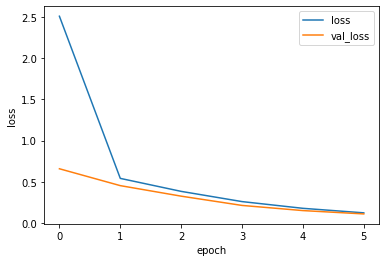

In [15]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

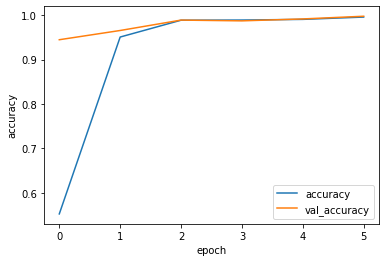

In [16]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [42]:


# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("C:\\Users\\muri-\\Desktop\\Devre_Tasarım\\weather_model.h", "wb").write(tflite_model)


import os 
basic_model_size = os.path.getsize("weather_model.h")
print("Model is %d bytes" % basic_model_size)
     

INFO:tensorflow:Assets written to: C:\Users\muri-\AppData\Local\Temp\tmpqoujfo5k\assets


INFO:tensorflow:Assets written to: C:\Users\muri-\AppData\Local\Temp\tmpqoujfo5k\assets


Model is 20312 bytes


In [17]:
dosya_yolu = r"C:\Users\muri-\Desktop\Devre_Tasarım\model.h"

# model.h dosyasını oluştur
with open(dosya_yolu, "w") as f:
    f.write("const unsigned char model[] = {\n")
    # model.h dosyasına TensorFlow Lite modelini ekleme
    with open("weather_model.tflite", "rb") as model_file:
        for line in model_file:
            # Bayt dizisini satır satır model.h dosyasına ekleyin
            f.write("    ")
            f.write(", ".join(f"{byte:#04x}" for byte in line))
            f.write(",\n")
    f.write("};")

print(f"{dosya_yolu} dosyası oluşturuldu.")



C:\Users\muri-\Desktop\Devre_Tasarım\model.h dosyası oluşturuldu.


In [43]:
import os
model_h_size = os.path.getsize("weather_model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 20,312 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
